<a href="https://colab.research.google.com/github/pedrofernandss/airbnb_prices_analysis/blob/main/airbnb_prices_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

One of the main aspects of a Data Scientist's work involves exploratory data analysis and data cleaning. To exercise this skill, I utilized the dataset provided by the Airbnb company, which contains information about rooms in the state of Rio de Janeiro.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import folium
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import display

In [6]:
anuncios = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb_prices_analysis/data/anuncios_airbnb.csv')
anuncios.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,288,2023-03-01,1.86,1,264,19,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,624,3,86,2023-03-27,0.56,3,357,1,NaN
2,200568,30m of Ipa Beach e fins de semana special price !,980805,Henrique,NaN,Ipanema,-22.98586,-43.19411,Entire home/apt,100,30,198,2023-02-13,1.45,6,59,9,NaN
3,342874,Comfortable in Copacabana beach,829630,Luciana,NaN,Leme,-22.96392,-43.17263,Entire home/apt,236,2,159,2023-02-26,1.19,3,105,31,NaN
4,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,307,3,262,2023-03-27,1.68,1,257,14,NaN


# Data cleaning



Before carrying out an analysis, it is necessary to clean our database

In [7]:
#Removing Unnecessary Columns to Reduce Data Size
anuncios.drop(columns=['name', 'host_name', 'id', 'host_id', 'neighbourhood_group', 'last_review', 'license'], inplace=True)
anuncios.to_excel('anuncios_airbnb.xlsx') #Converting the CSV file to xlsx due to reading errors

In [8]:
#Let's attempt to gather some general information from our data so that we can clean it properly.
anuncios.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,30476.000000,30476.000000,30476.000000,30476.000000,30476.000000,22972.000000,30476.000000,30476.000000,30476.000000
mean,-22.967200,-43.250334,981.616912,4.854312,18.260172,1.014667,9.816118,210.453865,6.631940
std,0.035228,0.099710,8625.188625,24.354187,38.502717,1.082735,28.249902,136.075327,10.830069
min,-23.073276,-43.701286,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,-22.984780,-43.308549,200.000000,1.000000,1.000000,0.230000,1.000000,85.000000,0.000000
50%,-22.972620,-43.195535,350.000000,2.000000,4.000000,0.700000,2.000000,212.000000,2.000000
75%,-22.954726,-43.185841,650.000000,4.000000,17.000000,1.440000,4.000000,359.000000,8.000000
max,-22.749690,-43.104400,595793.000000,1125.000000,588.000000,17.010000,224.000000,365.000000,146.000000


## Observations


*  75% of the values in "minimum_nights" are below four nights, with a maximum value of 1125 nights.
* The maximum amount someone can pay for an Airbnb is R$595,793.00 (which is highly discrepant from the Brazilian reality and our dataset).


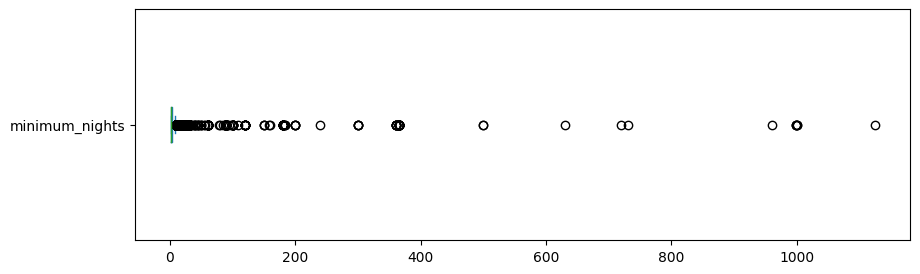

In [9]:
#Let's plot a graph to check how the 'minimum_nights' information is distributed
anuncios.minimum_nights.plot(kind='box', vert=False, figsize=(10,3))

#Remove situations where 'minimum_nights' is greater than 30 days (1 month)
anuncios.drop(anuncios[anuncios.minimum_nights > 30].index, axis=0, inplace=True)

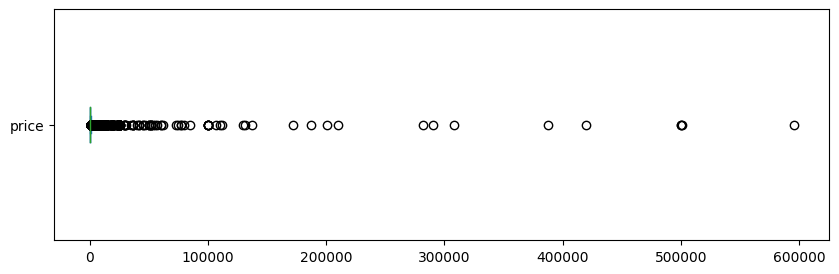

In [10]:
##Let's plot a graph to check how the 'price' information is distributed
anuncios.price.plot(kind='box', vert=False, figsize=(10,3))

#Removal of cases where the 'price' value is greater than R$3,000.00 (a little more than 3 times the standard deviation)
anuncios.drop(anuncios[anuncios.price > 3000].index, axis=0, inplace=True)

## Fetching empty values



In [11]:
print('Amount of empty information in each column:')
print(anuncios.isnull().sum())

Amount of empty information in each column:
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 6739
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


Since there is only one column with missing data, we will remove it and work with other information.

In [12]:
anuncios.drop(columns=['reviews_per_month'], inplace=True)

# Exploratory analysis

For an initial analysis, we will seek to understand how our data would be organized spatially (according to latitude and longitude)

<Axes: xlabel='longitude', ylabel='latitude'>

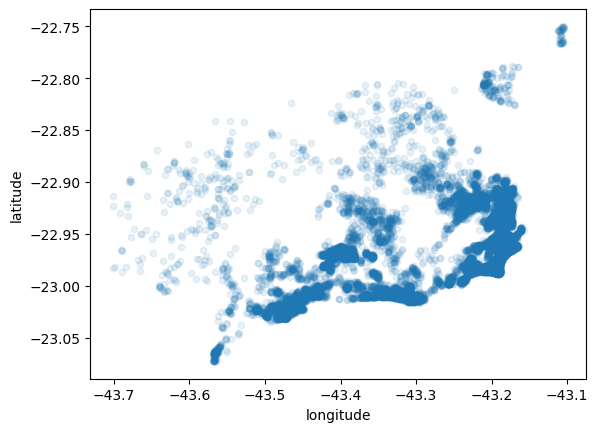

In [13]:
#Initial Plot of a Latitude and Longitude Point Plot
anuncios.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

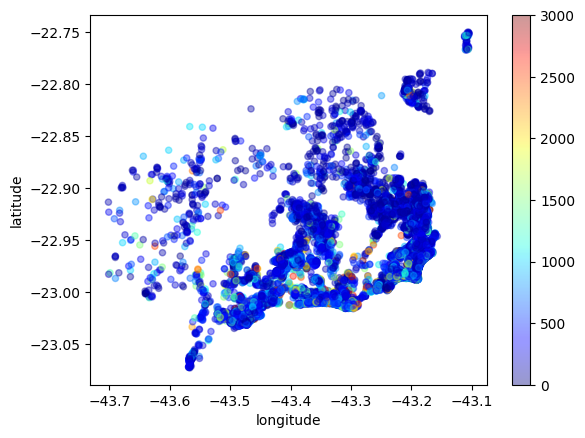

In [14]:
#Plotting a longitude x latitude graph with color variation according to rental price variation
anuncios.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=anuncios['price'], cmap=plt.get_cmap('jet'))

As a result, it can be seen that there is no variation in prices according to location, so it is possible to find cheap rentals very close to more expensive rentals.

Let's investigate further.

In [15]:
correlacao = anuncios.corr()
correlacao['price'].sort_values(ascending=False)

<ipython-input-15-5ff42ab7ca23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = anuncios.corr()


price                             1.000000
availability_365                  0.118831
minimum_nights                    0.105359
calculated_host_listings_count    0.081121
longitude                        -0.095786
number_of_reviews                -0.152274
latitude                         -0.196644
number_of_reviews_ltm            -0.203385
Name: price, dtype: float64

It can be seen in the table above that there is little correlation between the price variable and the other numerical variables.

Next, we will investigate how they can be related to categorical variables.

In [16]:
print(anuncios['room_type'].value_counts())

Entire home/apt    22673
Private room        6062
Shared room          492
Hotel room            47
Name: room_type, dtype: int64


There is a wide range of rentals for entire houses/apartments in the city of Rio de Janeiro

In [17]:
print(anuncios.groupby('room_type')['price'].mean())

room_type
Entire home/apt    559.477705
Hotel room         432.000000
Private room       307.699769
Shared room        182.335366
Name: price, dtype: float64


Therefore, when visiting Rio de Janeiro, if you want to rent an Airbnb you can expect shared rooms to be, on average, the cheapest as well as those with the most options.

To check which regions have the most expensive average price, let's create a simple bar chart

In [18]:
preco_medio_bairro = anuncios.groupby('neighbourhood')['price'].mean().reset_index()
top_10_bairros = preco_medio_bairro.nlargest(10, 'price')

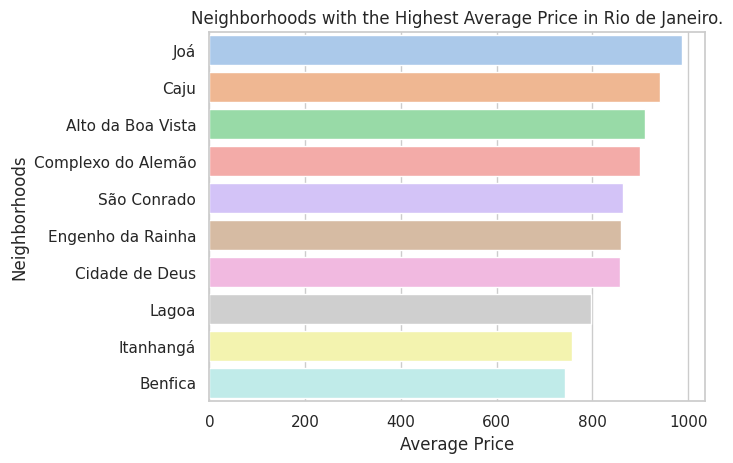

In [19]:
#Seaborn Aesthetic Settings
sb.set(style="whitegrid")
pastel_palette = sb.color_palette("pastel")
sb.set_palette(pastel_palette)

#Plotting
sb.barplot(x='price', y='neighbourhood', data=top_10_bairros, orient='h')
plt.xlabel('Average Price')
plt.ylabel('Neighborhoods')
plt.title('Neighborhoods with the Highest Average Price in Rio de Janeiro.')
plt.show()

Caso se deseje visualizar o preço médio de todos os bairros do Rio de Janeiro, utilize o mapa iterativo abaixo

In [20]:
#Create a map centered on Rio de Janeiro.
rio_map = folium.Map(location=[-22.9068, -43.1729], zoom_start=12)

#Add markers for each neighborhood with average price information
for index, row in preco_medio_bairro.iterrows():
    bairro = row['neighbourhood']
    preço_medio = row['price']

    #Check if the neighborhood is among the 10 with the highest prices
    if bairro in top_10_bairros['neighbourhood'].values:
        icone = folium.Icon(color='red', icon='info-sign')  #Red icon for top 10
    else:
        icone = folium.Icon(color='blue')  #Blue icon for others

    popup_text = f"Neighbourhood: {bairro}<br>Average price: R$ {preço_medio:.2f}"
    folium.Marker(location=(anuncios[anuncios['neighbourhood'] == bairro]['latitude'].iloc[0],
                  anuncios[anuncios['neighbourhood'] == bairro]['longitude'].iloc[0]),
                  popup=popup_text,
                  icon=icone).add_to(rio_map)

#Display the map on the screen
display(rio_map)

With this in mind, we will seek to understand the opinion of contracting customers and where they tend to stay most often and where the best-rated airbnbs are found.

In [21]:
avaliacao_media_bairro = anuncios.groupby('neighbourhood')['availability_365'].mean()
top_5_bairros = avaliacao_media_bairro.nsmallest(5)
print("Neighborhoods with lower average availability throughout the year:")
print('')
for bairro, qtnd_media in top_5_bairros.items():
    print(f"{bairro}: {qtnd_media:.0f} days available, on average")

Neighborhoods with lower average availability throughout the year:

Acari: 0 days available, on average
Magalhães Bastos: 0 days available, on average
Manguinhos: 0 days available, on average
Abolição: 86 days available, on average
Engenheiro Leal: 89 days available, on average


# Conclusion

Based on the explored data, it is evident that there is no strict price stratification by region in the city of Rio de Janeiro. In other words, affordable and luxurious rooms or apartments can be found in various locations.

However, entire apartments tend to have the highest prices on average compared to other categories, and rentals typically last for an average of 5 days.

In addition to this, neighborhoods such as Acari, Magalhães Bastos, and Manguinhos emerge as the preferred choices among platform users. Interestingly, none of these neighborhoods were among the top 10 in terms of the highest rental prices.

Given the low correlation between all numerical variables, we chose not to employ machine learning techniques for predictive purposes.